# Cardio Good Fitness


### Input Data:

- **CardioGoodFitness.csv:** The data is for customers of the treadmill product(s) of a retail store called Cardio Good Fitness.


### Objective:

* Come up with a customer profile (characteristics of a customer) of the different products
* Perform uni-variate and multi-variate analyses
* Generate a set of insights and recommendations that will help the company in targeting new customers

### Columns
* Product - the model no. of the treadmill
* Age - in no of years, of the customer
* Gender - of the customer
* Education - in no. of years, of the customer
* Marital Status - of the customer
* Usage - Avg. # times the customer wants to use the treadmill every week
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income - of the customer
* Miles- expected to run/Week


## Approach 

* Import requried data and setup pandas dataframe & styles
* understand data, data types, numerical and categorical data, 
* check summary information
* explore oppurtunity to expand new data bukets that can used for reporting and group by 
* Find outliers from each sections using differnt plots 
* Understand nature of the customer, product owned, characteristics with different graphs & tables 
* provide consolidated summary about customer characteristics

## Observations
* each section/tables/chart will have observations and summary of all critial observation added to final summary 


### Import Packages, Data, styles and initial setup

In [1]:
#numpy and pandas to manage import, manage data 

# import numpy 
import numpy as np 
# import pandas  
import pandas as pd 

#matplotlib & seaborn packages to generate graphs

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#setting graph plots background style as darkgrid
sns.set_theme(style="darkgrid")  
#to generate graphs/plots inline in jupyter notebook
%matplotlib inline  
#to round age, income and other numerical columns to 2 digit decimal
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

### Read Data from given csv file and load to a panda DataFrame 
* dataframe attribute name df
* handle errors in case file is invalid

In [2]:
df=None
inputFileName="CardioGoodFitness.csv"
try:
     df = pd.read_csv(inputFileName)
except FileNotFoundError as err:
    print(f'Error : cannot import file : {inputFileName}, Error : {err.args[1]} ')
finally:
    if not isinstance(df,pd.core.frame.DataFrame):
        print(f'Cannot proceed further, Dataframe is null'); 
        #dont want to stop the process in notebook, ideally next steps would not proceed.
    else:
         print(f'input file : {inputFileName} data imported.');  


input file : CardioGoodFitness.csv data imported.


### Data import complete. Proceed to check for shape, check null data if any

In [3]:
# get rows and columns count
dataSize = df.shape

print(f'Cardio Good Fitness input data has : {dataSize[0]} rows and {dataSize[1]} columns.');  

# check how many null/nan valkues exists

print(f'Cardio Good Fitness input data has :\n{df.isna().sum()}');

Cardio Good Fitness input data has : 180 rows and 9 columns.
Cardio Good Fitness input data has :
Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


### observation about data count and null
* input data has 180 rows and 9 columns. 
* none of the columns has null or nan values, No missing data so we dont need to replace any data with default or mean values

### Checking for Data Types for columns 

In [4]:
# understand columns and its data types
# required to determine which are categorical and numberical for groupby and charts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### observation about data types
* all columns are not null 
* index column, - default index 0 to 179 assigned. 
* Product, Gender, MaritalStatus are string type categorical data.
* Age, Education, Usage, Fitness, Income and Miles are numerical 
* Age, Usage, Fitness, Income and Miles - are quantitative data 
* Education - Education Level is represented in number so this can be made categorical - No point in calling sum or mean on Education Level 
* Fitness column can be used to derive new categorical bucket columns like Very Fit, Fit Etc.
* Age can be transffered as another categorical type as Teen, Adults etc 

### checking sample values from the data frame

In [5]:
df.sample(5) # checking sample datas 

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
173,TM798,35,Male,16,Partnered,4,5,92131,360
22,TM195,24,Female,16,Single,4,3,42069,94
151,TM798,25,Male,16,Partnered,4,4,62251,160
48,TM195,28,Male,14,Single,4,3,54576,113
60,TM195,33,Female,16,Partnered,3,3,46617,85


### Checking product count and types
* different types of product 
* counts of product with customers

In [6]:
# checking product count and types
productsCount = df["Product"].nunique()
productsTypes = df["Product"].unique()
print(f'Cardio Good Fitness Data has total {productsCount} products, Products are {productsTypes}');

Cardio Good Fitness Data has total 3 products, Products are ['TM195' 'TM498' 'TM798']


### Observation about Products Types
* they have 3 different products 
* 'TM195' 'TM498' 'TM798'

In [7]:
# checking how many male and female 

df.groupby(["Gender"])['Age'].count().sort_values(ascending=False).reset_index()

,Gender,Age
0,Male,104
1,Female,76


### observation about gender
* total 104 male and 76 female profile in system

### checking for statistical summary for all the datasets

* checking all quantitative types - "Age","Usage","Fitness","Income","Miles"

In [8]:
df[["Age","Usage","Fitness","Income","Miles"]].describe(include="all") 
#include="all" is optional since all these are numerical columns

,Age,Usage,Fitness,Income,Miles
count,180.00,180.00,180.00,180.00,180.00
mean,28.79,3.46,3.31,53719.58,103.19
std,6.94,1.08,0.96,16506.68,51.86
min,18.00,2.00,1.00,29562.00,21.00
25%,24.00,3.00,3.00,44058.75,66.00
50%,26.00,3.00,3.00,50596.50,94.00
75%,33.00,4.00,4.00,58668.00,114.75
max,50.00,7.00,5.00,104581.00,360.00


## observation on datasets statistical summary

* we have 180 records

### Age
* Avg age is 28.79, Min user is 18 yrs old and max is 50 yrs. 
* 25% falls on or under 24 yrs, 50% falls on on under 26, 75% on or under 33 yrs old.

### Usage Weekly

* Avg all users use 3.46 times treadmills everyweek, Min is  times, max is 7 times 
* 25% is 3, 50% is also 3 and 75% is 4 times.

### Fitness

* Avg fitness of all customers are 3.31 (Moderate to Fit), Min is unhealthy, Max is Very Fit 
* 25% are moderate, 50% are moderate and 75% is fit

### Miles Expected to run weekly

* Avg 103.19 miles / Week, Min is 21 miles/Week, max is 360 miles, 25% runs 66 miles,  50% runs 94 miles, 75% runs 114.75 miles/Week

### Income level

* Avg income is 53719.58, Min is 29562.00, Max is 104581.00	
* 25% is  44058.75, 50% is 50596.50 and 75% is 58668.00



# Product informations

In [9]:
## Checking Product counts 

df.groupby(["Product"])['Age'].count().sort_values(ascending=False).reset_index()

,Product,Age
0,TM195,80
1,TM498,60
2,TM798,40


In [10]:
#finding count for product wit gender 

df.groupby(['Product','Gender'])['Age'].count()

Product  Gender
TM195    Female    40
         Male      40
TM498    Female    29
         Male      31
TM798    Female     7
         Male      33
Name: Age, dtype: int64

In [11]:
# find number of people fitness level by product and gender 

df.groupby(['Product','Gender', 'Fitness'])['Fitness'].count()

Product  Gender  Fitness
TM195    Female  2          10
                 3          26
                 4           3
                 5           1
         Male    1           1
                 2           4
                 3          28
                 4           6
                 5           1
TM498    Female  1           1
                 2           6
                 3          18
                 4           4
         Male    2           6
                 3          21
                 4           4
TM798    Female  3           1
                 4           1
                 5           5
         Male    3           3
                 4           6
                 5          24
Name: Fitness, dtype: int64

## observation on product 

* TM195 is with 80 customers, 40 male amd 40 female and with different fitness levels
* TM498 is with 60 customers, 29 female, 31 Male
* TM798 is with 40 customers, 7 Female, 33 Male

### Creating new columns age group and fitness level 

In [12]:
# Create new columns age group and fitness Level for better reporting 

df['age_group']=pd.cut(df['Age'], bins=(0,14,24,50,100),labels=('Children','Youth','Adults','Seniors'))
df['fitness_level']=pd.cut(df['Fitness'], bins=(0,1,2,3,4,5),labels=('very unfit','unfit','moderate','fit','very fit'))


df.sample(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,fitness_level
106,TM498,25,Female,14,Single,2,2,45480,42,Adults,unfit
128,TM498,35,Female,14,Partnered,3,2,52302,53,Adults,unfit
97,TM498,25,Female,14,Partnered,2,3,45480,85,Adults,moderate
27,TM195,25,Female,14,Partnered,3,3,48891,75,Adults,moderate
32,TM195,25,Female,16,Partnered,2,2,40932,47,Adults,unfit


### observation

* age_group and fitness_level can be used as catroty columns for report

## Categorical Data Plots

## Count Plots 



Text(0.5, 1.0, 'Product by Gender')

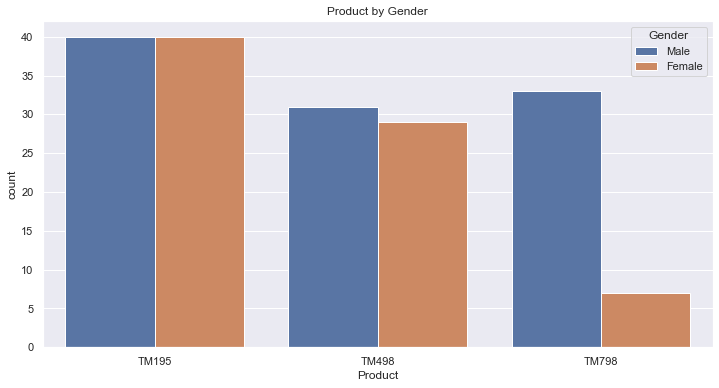

In [13]:
# count Plots of the product with Gender 
plt.figure(figsize=(12,6))
sns.countplot(x='Product',data=df, hue="Gender");

plt.title('Product by Gender')



### Observations
* We can get clear count of Male/Female owns different products
* TM195 is with 80 customers, 40 male amd 40 female and with different fitness levels
* TM498 is with 60 customers, 29 female, 31 Male
* TM798 is with 40 customers, 7 Female, 33 Male

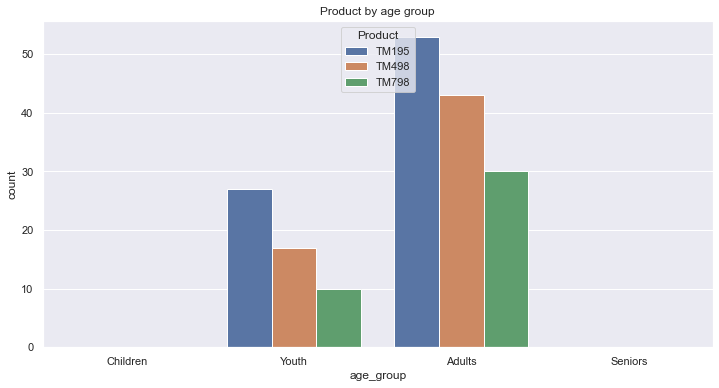

In [14]:
# count Plots age group using those products 
plt.figure(figsize=(12,6))
sns.countplot(x='age_group',data=df, hue="Product");
plt.title('Product by age group');


### Observations
* Clearly we dont have any childeren or Seniors age groups with our customer profile
* Product own count does not change by age_group many has TM195, then TM498 and few customer has TM798
* Majority of the customers are Adult age group

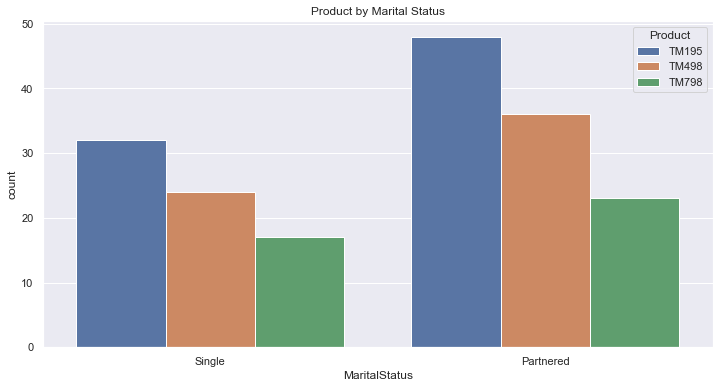

In [15]:
# count Plots by Marital Status using those products 
plt.figure(figsize=(12,6))
sns.countplot(x='MaritalStatus',data=df, hue="Product");
plt.title('Product by Marital Status');


### Observations
* are similar like age group, partnerded many has own TM195, then TM498 and few customer has TM798 compared to singles.

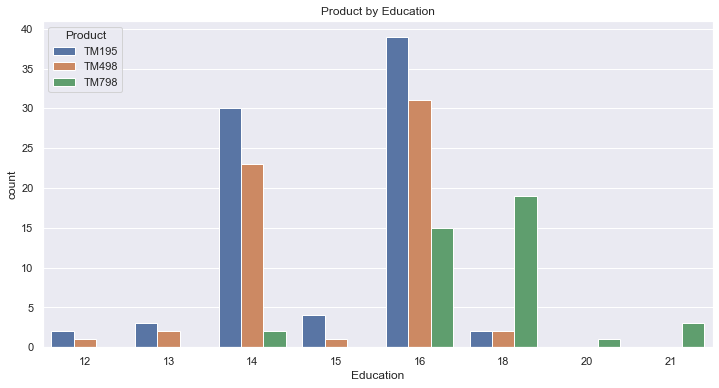

In [16]:
# count Plots age group using those products 
plt.figure(figsize=(12,6))
sns.countplot(x='Education',data=df, hue="Product");
plt.title('Product by Education');


### Observations
* Clearly we can see education level 14 and 16 owns most of. the products 
* Education level 18 and more owns mostly TM798 
* Education Level 14 or 16 mostly owns TM195 and TM498

Text(0.5, 1.0, 'Fitness level by Gender')

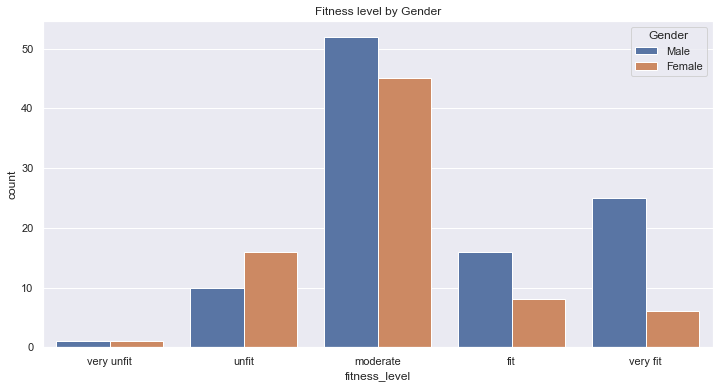

In [17]:
# lets check fitness level of customers 

plt.figure(figsize=(12,6))
sns.countplot(x='fitness_level',data=df, hue="Gender");
plt.title('Fitness level by Gender')

### Observations
* Most of the customer are moderate fitness level. 
* very few customers are fit and very fit
* very few customers are unfit and very unfit 

* men has better counts on Moderare, fit and very fit(very fit has high counts compared to female) 
* unfit has most count for women than men 

# Univariate Analysis 

* Usage
* Income
* Miles
* Age 
* Fitness


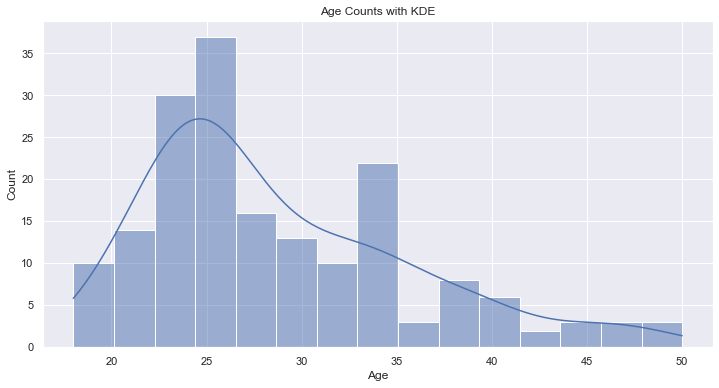

In [18]:
# Checking Age 
plt.figure(figsize=(12,6))
sns.histplot(df['Age'],kde=True,bins=15);
plt.title('Age Counts with KDE');

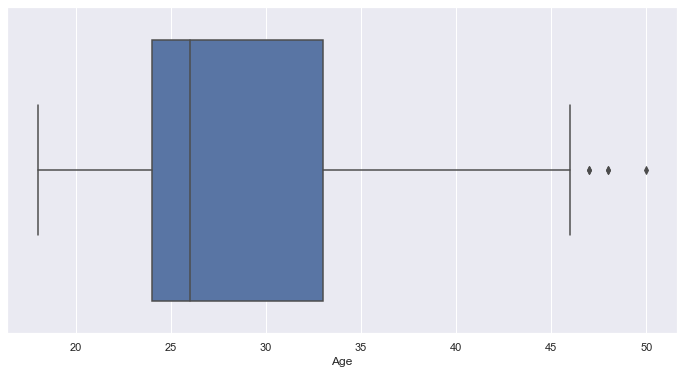

In [19]:
# Checking Age for any outliers
plt.figure(figsize=(12,6))
sns.boxplot(data = df, x = 'Age');

### Observations on univariate Analysis 

* Majority customers are within age 20 to 30 
* very few customers are greater than 40
* there are few outliers beyond age 46


Text(0.5, 1.0, 'Fitness Counts with KDE')

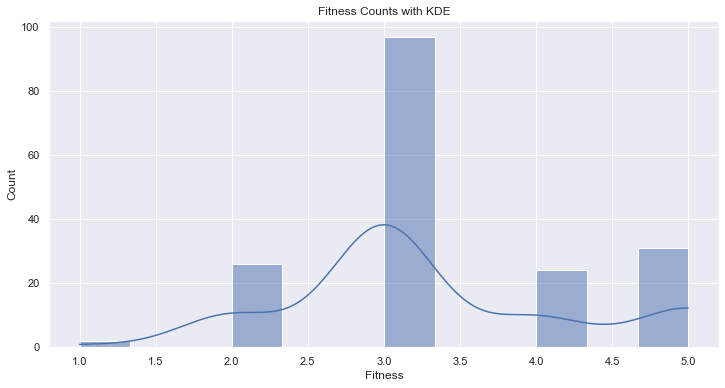

In [20]:
# Checking Fitness 
plt.figure(figsize=(12,6))
sns.histplot(df['Fitness'],kde=True);
plt.title('Fitness Counts with KDE')

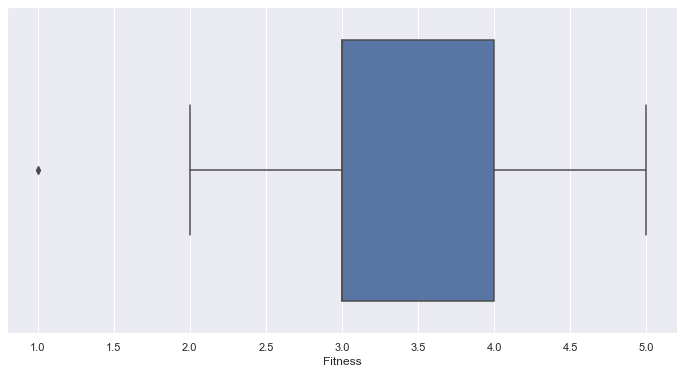

In [21]:
# Checking fitness for any outliers
plt.figure(figsize=(12,6))
sns.boxplot(data = df, x = 'Fitness');

### Observations on univariate Analysis 

* Majority customers are moderate fit with score 3.0
* still gound amount of customer are Fit and Very Fit 
* very few cusomters are unfit and very very low count of customers are very unfit
* has one very unfit outlier


Text(0.5, 1.0, 'Income Counts with KDE')

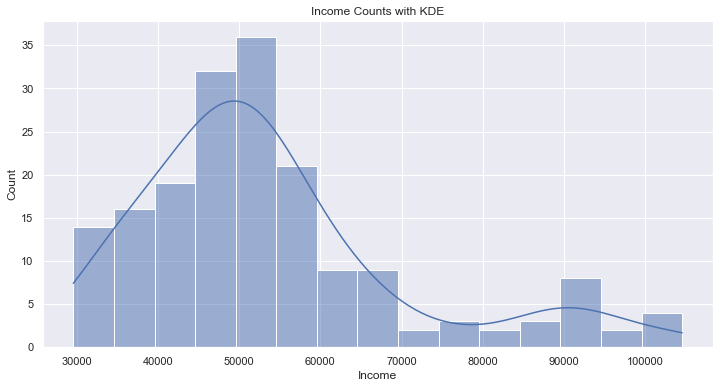

In [22]:
# Checking Income Level 
plt.figure(figsize=(12,6))
sns.histplot(df['Income'],kde=True);
plt.title('Income Counts with KDE')

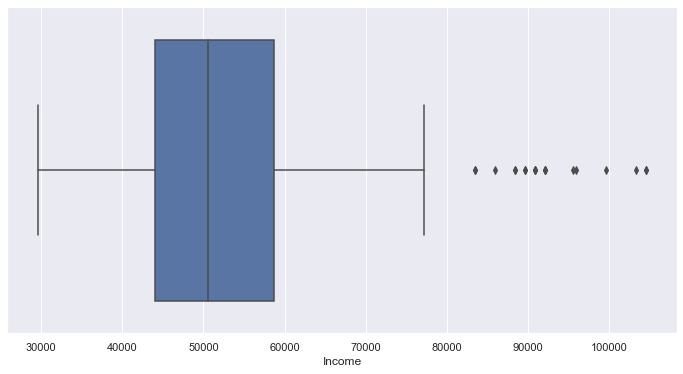

In [23]:
# Checking income for any outliers
plt.figure(figsize=(12,6))
sns.boxplot(data = df, x = 'Income');

### Observations on univariate Analysis 

* Majority customers are within income range 30000 to 70000
* very few are making more than 70000
* and we have many outliers beyond 80K


Text(0.5, 1.0, 'Usage Counts with KDE')

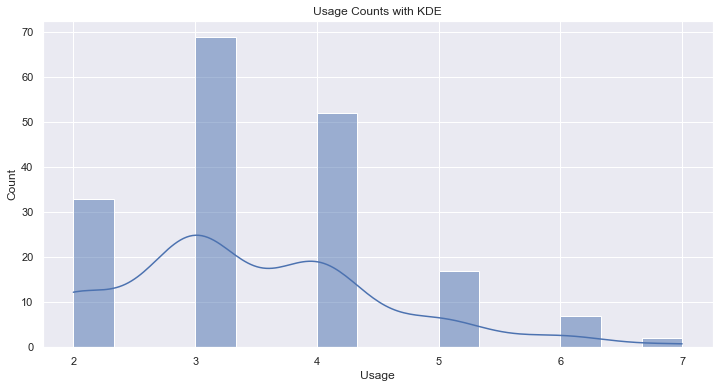

In [24]:
# Checking Usage 
plt.figure(figsize=(12,6))
sns.histplot(df['Usage'],kde=True,bins=15);
plt.title('Usage Counts with KDE')

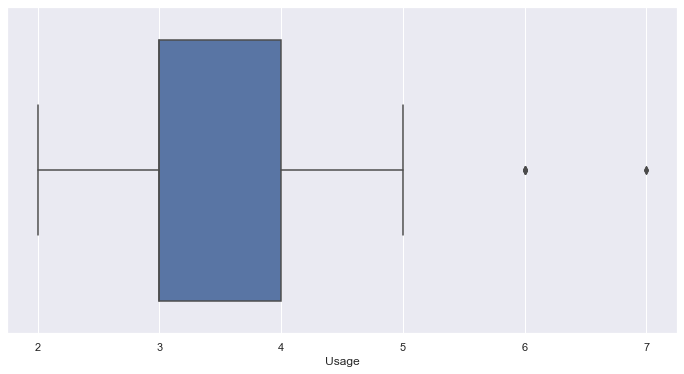

In [25]:
# Checking Usage for any outliers
plt.figure(figsize=(12,6))
sns.boxplot(data = df, x = 'Usage');

### Observations on univariate Analysis 

* Majority customers using 3 to 4 tmes weekly 
* still gound amount of customer using 2 times 
* very few cusomters are using more than 5 times 
* some outliers with 6 and 7 usage/week


Text(0.5, 1.0, 'Miles Counts with KDE')

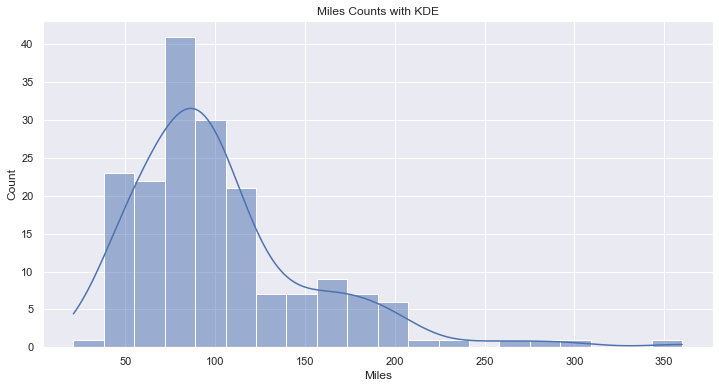

In [26]:
# Checking Fitness 
plt.figure(figsize=(12,6))
sns.histplot(df['Miles'],kde=True);
plt.title('Miles Counts with KDE')

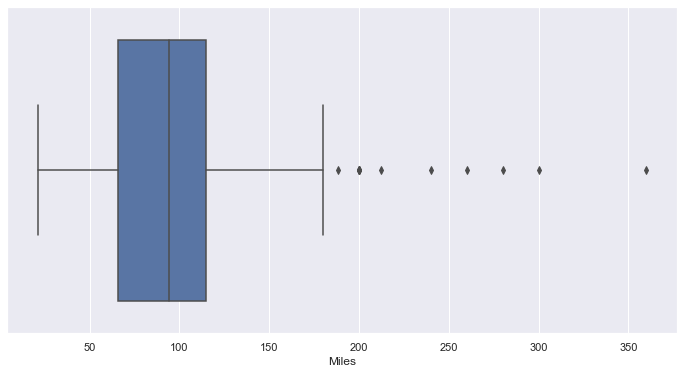

In [27]:
# Checking Miles for any outliers
plt.figure(figsize=(12,6))
sns.boxplot(data = df, x = 'Miles');

### Observations on univariate Analysis 

* Majority customers are expected to run 50 to 110 miles a week 
* some customer are running more than 110 to 200 miles 
* very few cusomters are expected to run more than 200 miles 
* has lot of outliers beyond 175 miles/week


# Multivariate Data Analysis 



## Multivariate Data Analysis on Numerical Data  

### Checking Age vs Other dimensions

### Checking age vs fitness

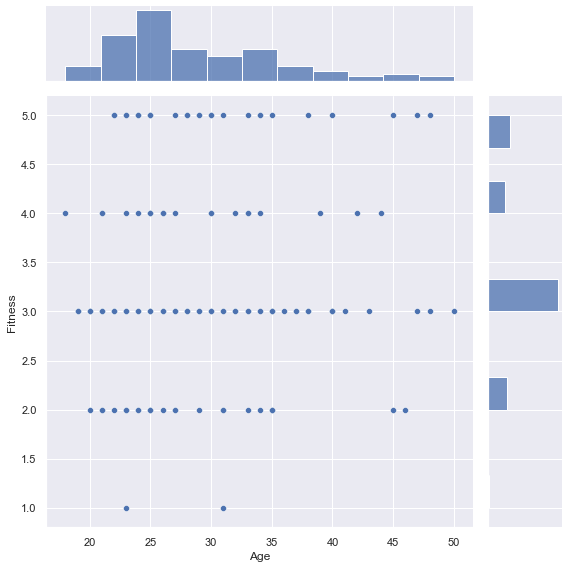

In [28]:
sns.jointplot(x='Age',y='Fitness',data=df, height=8);
plt.show();

<AxesSubplot:xlabel='Age', ylabel='Fitness'>

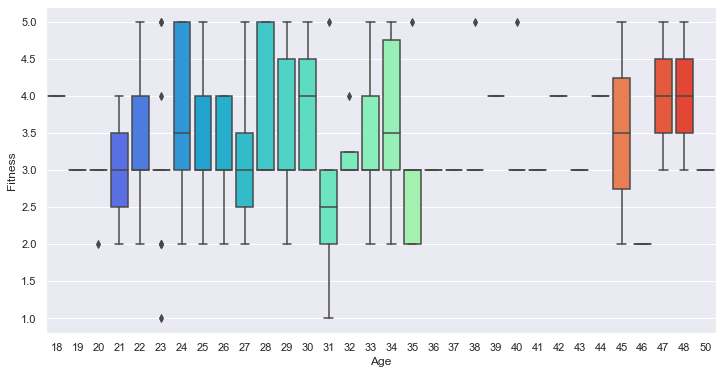

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Age',y='Fitness',data=df,palette='rainbow')

### observations

* 2 customers in mid 20s and 30s are very unfit
* some customers accross all age group are unfit 
* Majoirty custmers are moderate fit, and good amount in fit and very fit accross all age groups
* few outliers in age 20, 23, 32,33, 39, 41 shows very fit 
* one outlier in very unit at age 23 
* otherwise different age group fitness level vary from 2-4, some are in 5  

### Checking age vs education

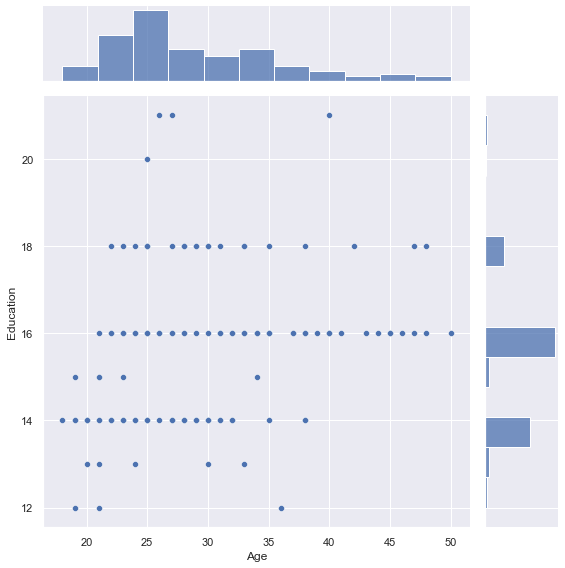

In [30]:
sns.jointplot(x='Age',y='Education',data=df, height=8);

<AxesSubplot:xlabel='Age', ylabel='Education'>

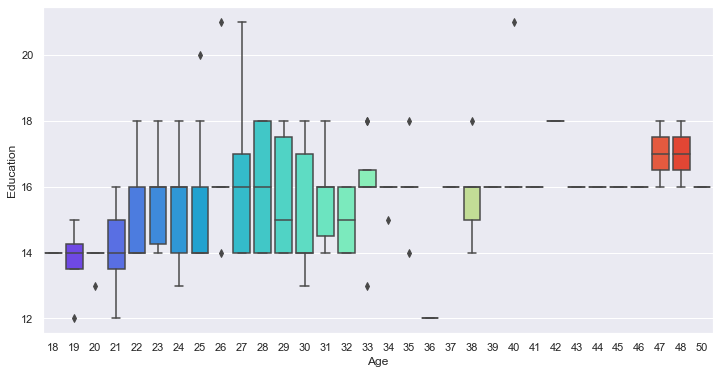

In [31]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Age',y='Education',data=df,palette='rainbow')

### observations
* majority cutomers accorss all age group are with in education level 16 to 18 
* age 20 to 30 has more education level 14 
* very few in level 12, 13 or above 18
* we have outuliers around level 12,13, above 20, age gorup 30 and bove has some outliers with level 18 or more 

### Checking age vs income

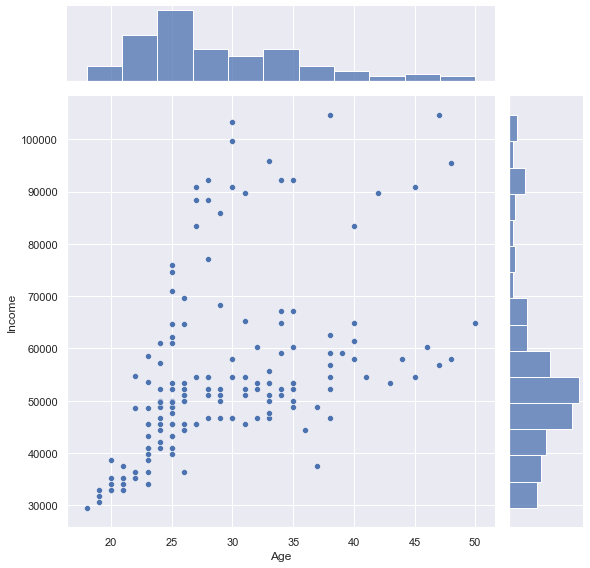

In [32]:
sns.jointplot(x='Age',y='Income',data=df, height=8)

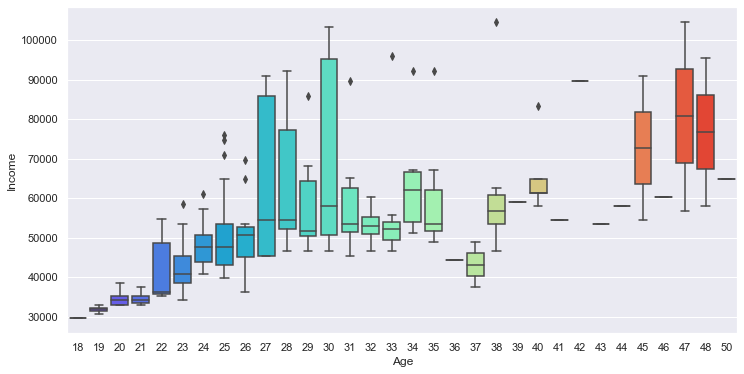

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Age',y='Income',data=df,palette='rainbow');

### observations

* income spread accross age, gradual increase in income with older age 
* some customer has high/low level in lower age and higher age groups 
* some outliers with higher income in age groups 23 to 38 


### Checking age vs Miles run weekly

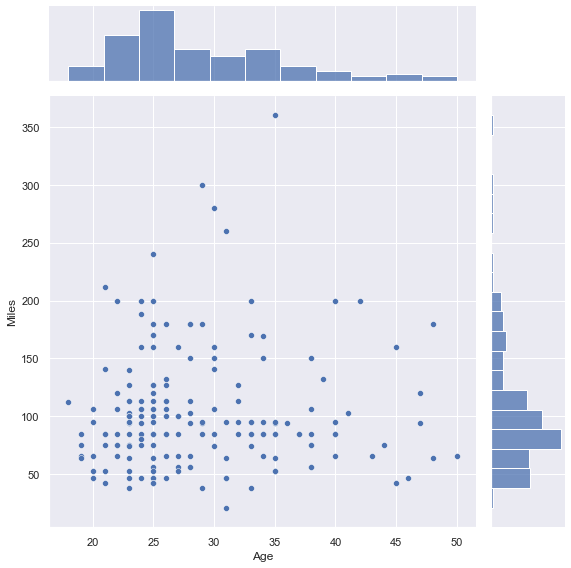

In [34]:
sns.jointplot(x='Age',y='Miles',data=df, height=8);

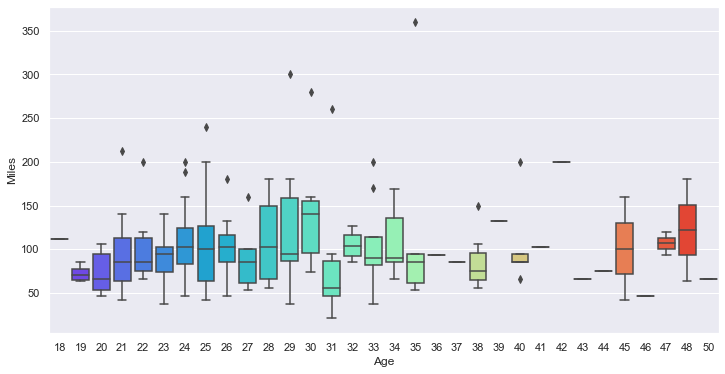

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Age',y='Miles',data=df,palette='rainbow');

### observations

* majority customers on all age groups run less than 100 miles / week 
* very few accorss all age  group run more than 100 miles 
* outliers in age group 21- 40 with high miles / week - very few 

### Checking Fitness vs Income

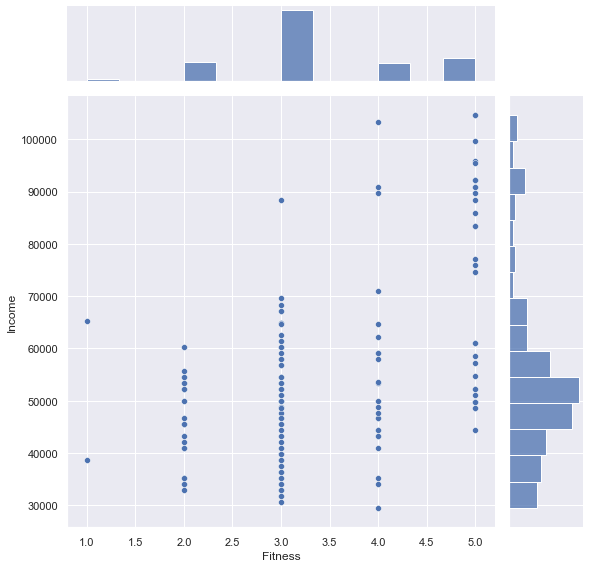

In [36]:
sns.jointplot(x='Fitness',y='Income',data=df, height=8);

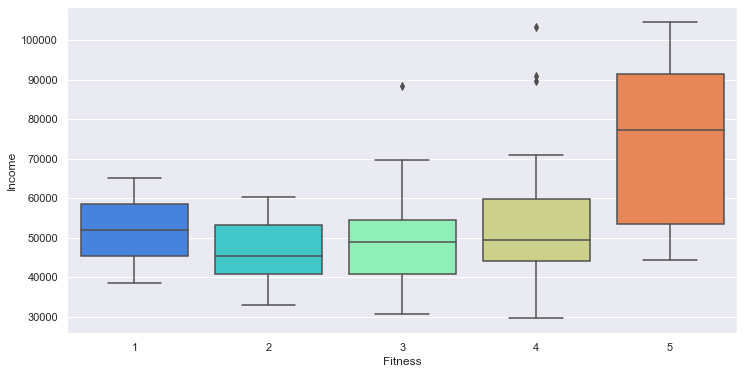

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Fitness',y='Income',data=df,palette='rainbow');

### observations

* high income customers are fit or very fit 
* most customers income betweeb 30k to 70K falls within fitness level 2 to 4 
* some outluers on fitless level 3 and 4 with high incomes

### Checking Fitness vs Education

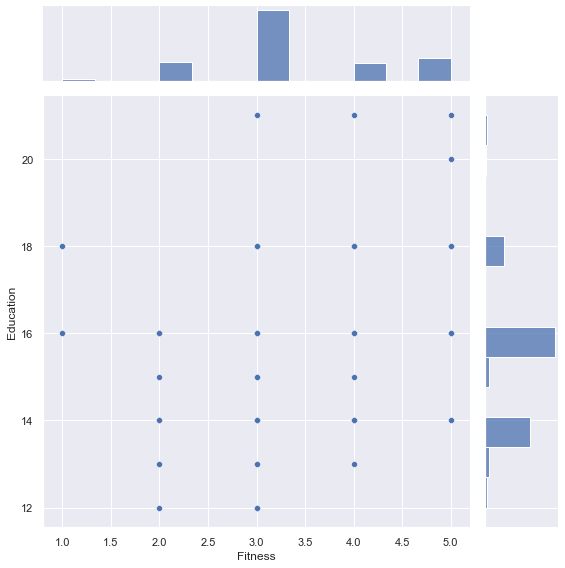

In [38]:
sns.jointplot(x='Fitness',y='Education',data=df, height=8);

<AxesSubplot:xlabel='Fitness', ylabel='Education'>

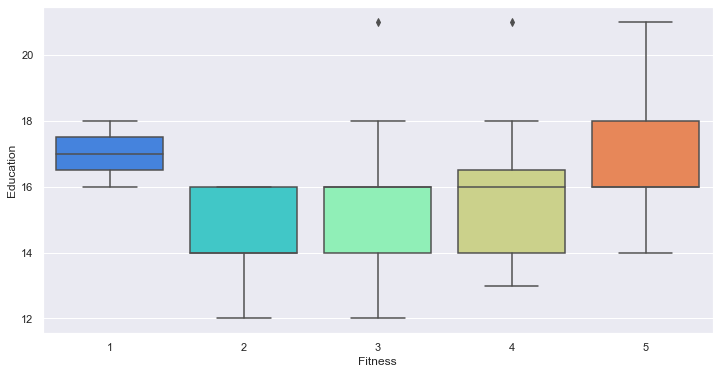

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Fitness',y='Education',data=df,palette='rainbow')

### observations

* higher education level shows high fitness level
* some outliers in 3 and 4 with high education level 

### Checking fitness vs miles

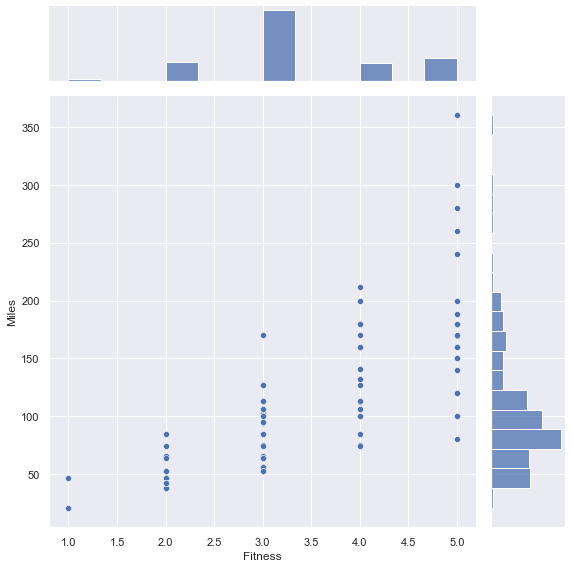

In [40]:
sns.jointplot(x='Fitness',y='Miles',data=df, height=8);

<AxesSubplot:xlabel='Fitness', ylabel='Miles'>

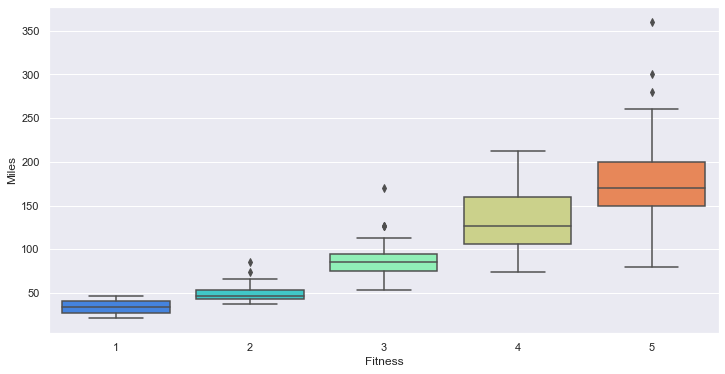

In [41]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Fitness',y='Miles',data=df,palette='rainbow')

### observations

* more miles they run, they show more fit 
* customer run less than 50 miles are in fitness level 1 and 2 
* some outliers in level 2 to 4 with miles running , level 5 has more outliers 

### Checking usage vs income

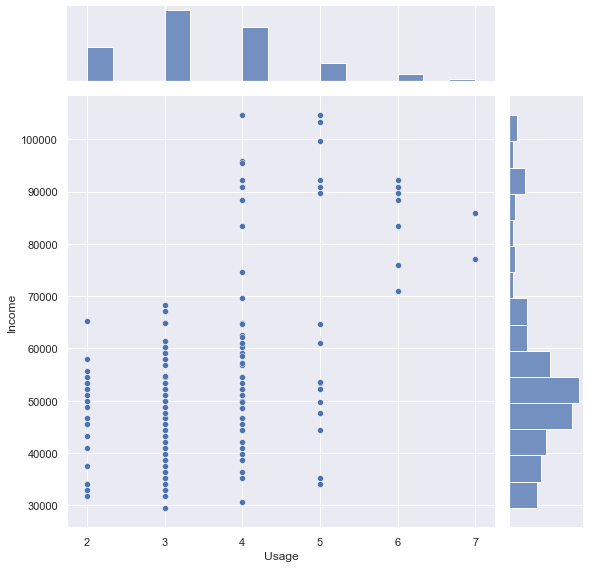

In [42]:
sns.jointplot(x='Usage',y='Income',data=df, height=8);

<AxesSubplot:xlabel='Usage', ylabel='Income'>

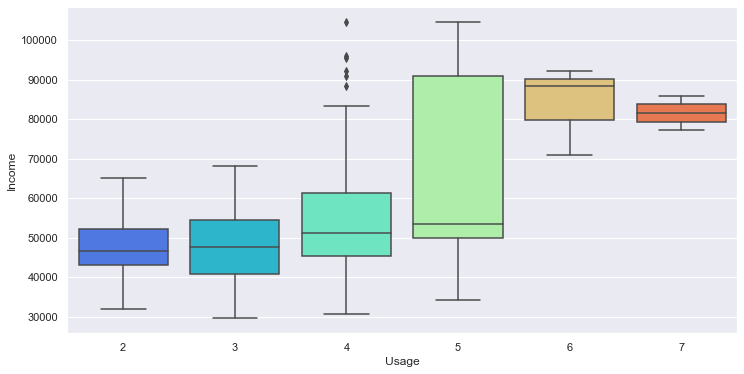

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Usage',y='Income',data=df,palette='rainbow')

### observations

* low income customers uses the system less compoared to high income 
* < 70K incomes uses <4 times a week 
* there are outliers only in people using 4 times day with income 

### Checking Education vs Income

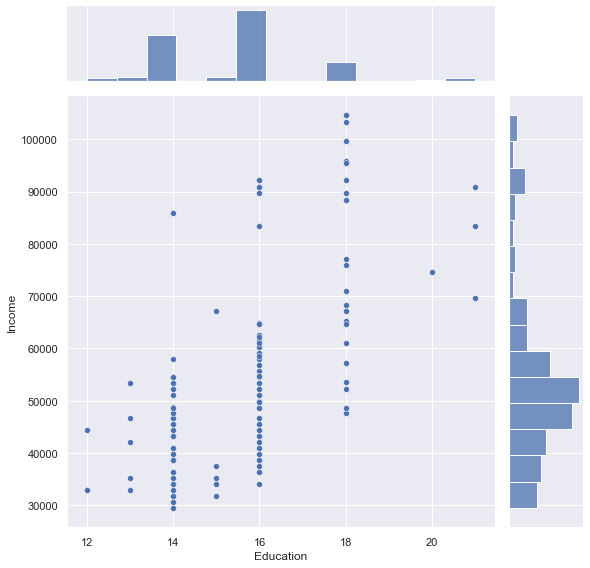

In [44]:
sns.jointplot(x='Education',y='Income',data=df, height=8);

<AxesSubplot:xlabel='Education', ylabel='Income'>

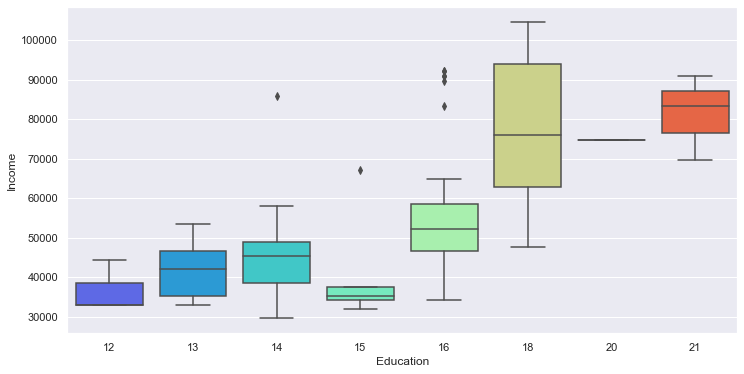

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Education',y='Income',data=df,palette='rainbow')

### observations

* higher education shows higher income 
* education level less than 15 are making less than 60K income 
* some outliers in Level 14, an 16 with high incomes 

## Multivariate Data Analysis on Categorical Data  

Text(0.5, 1.0, 'Product vs Fitness by Gender')

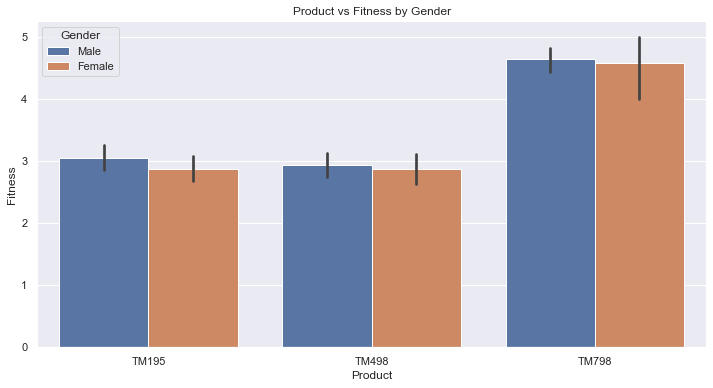

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(x='Product',y='Fitness',data=df, hue="Gender");

plt.title('Product vs Fitness by Gender')


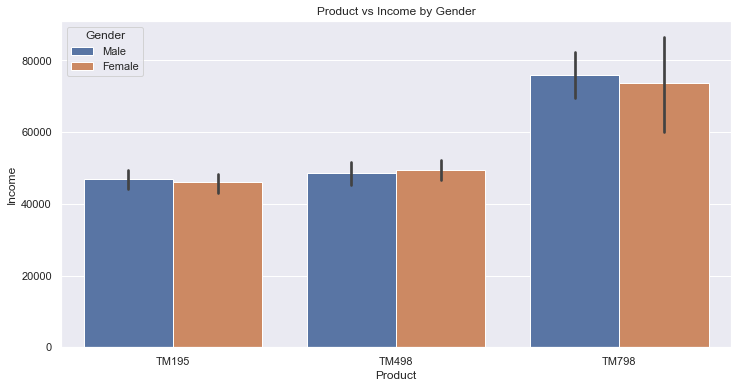

In [47]:
plt.figure(figsize=(12,6))
sns.barplot(x='Product',y='Income',data=df, hue="Gender");

plt.title('Product vs Income by Gender');


### Observations 

* mostly all the customers using 3 product are at fitness level 3

Text(0.5, 1.0, 'Gender income level')

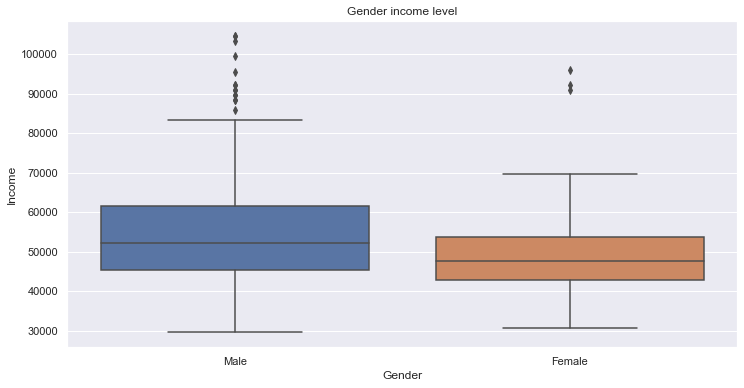

In [48]:
# Checking outliers on income level 
plt.figure(figsize=(12,6))
sns.boxplot(x='Gender',y='Income',data=df);
plt.title('Gender income level')

### Observations on income

* Men and women has some outliers making more than 85K
* men makes 25% is 46K, 50% is 51K and 75% is 61K
* women makes 25% is 43K, 50% is 51K and 75% is 55K

Text(0.5, 1.0, 'Gender income level')

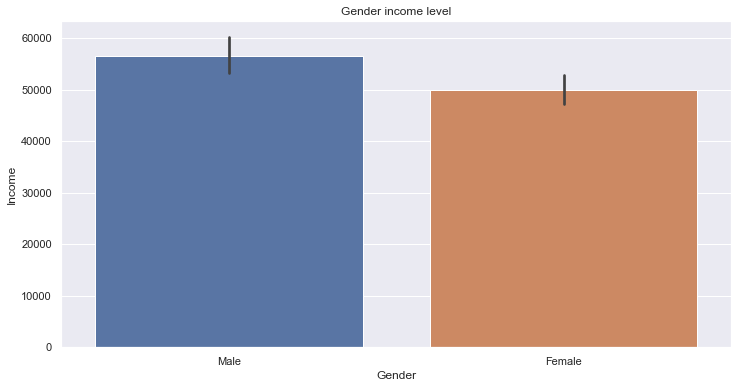

In [49]:
#Bar chart on income level
plt.figure(figsize=(12,6))
sns.barplot(x='Gender',y='Income',data=df);
plt.title('Gender income level')

### Product and Usage 

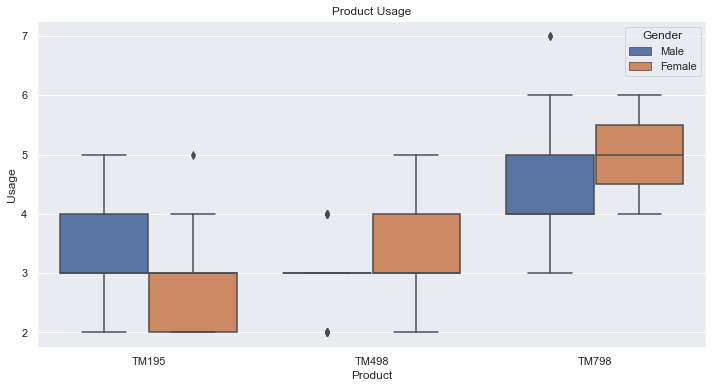

In [50]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Product',y='Usage',data=df, hue="Gender");
plt.title('Product Usage');

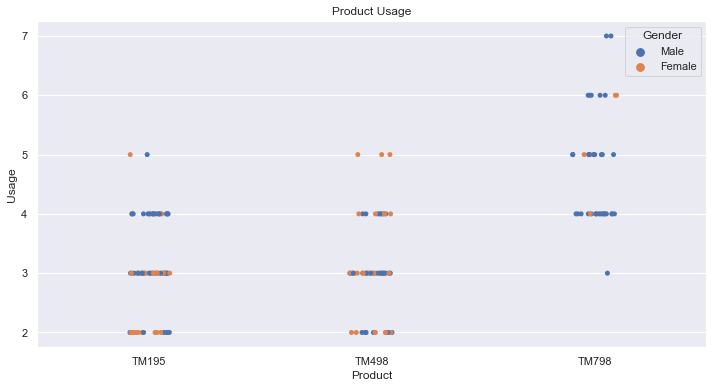

In [51]:
plt.figure(figsize=(12,6))
sns.stripplot(x='Product',y='Usage',data=df, hue="Gender");
plt.title('Product Usage');

### Observations


* some outliers on all 3 product with high and low usage 
* TM798 has high usage compared to other 2 products 


### Product and Fitness 

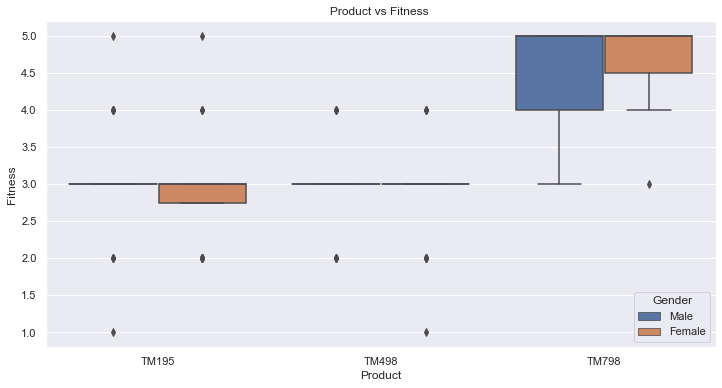

In [52]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Product',y='Fitness',data=df, hue="Gender");
plt.title('Product vs Fitness ');

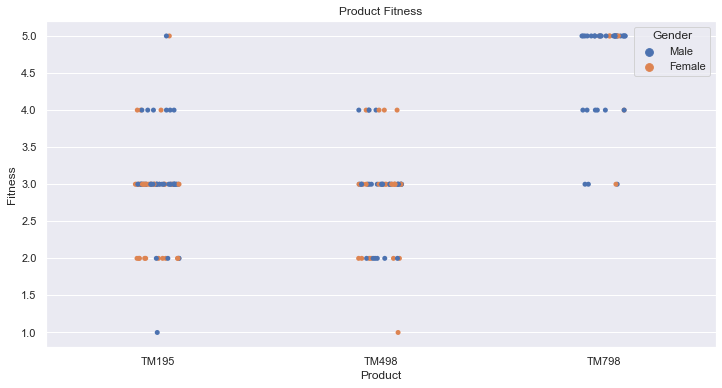

In [53]:
plt.figure(figsize=(12,6))
sns.stripplot(x='Product',y='Fitness',data=df, hue="Gender");
plt.title('Product Fitness');

### Observations

* fitness level outlier exists with all 3 products 
* TM 798 has high fitness level compared to other 2 product 
* other 2 product has more customer in moderate and fit category 

## Heat Map

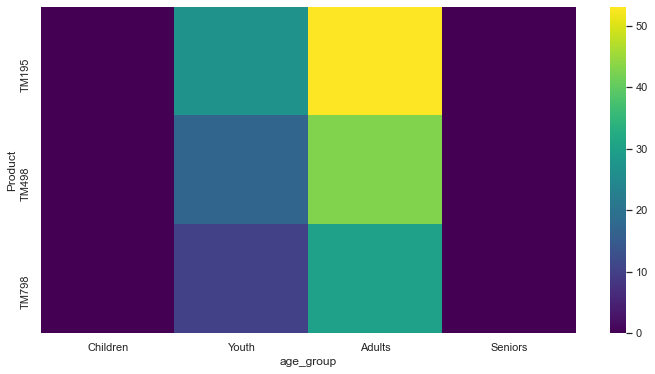

In [54]:
df1 = df.groupby(by=['Product','age_group']).count()['Usage'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(df1,cmap='viridis');

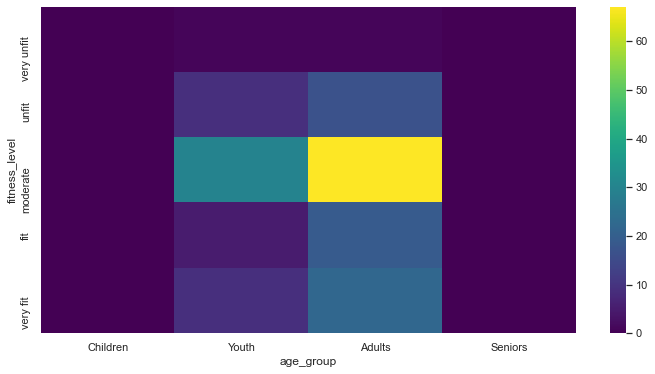

In [55]:
df1 = df.groupby(by=['fitness_level','age_group']).count()['Usage'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(df1,cmap='viridis');

### observations 

* TM195, Tm498 has high usage with adults 
* TM798 has high usage within youth age group 
* youth and adults as more moderate fit than other age groups 

## Correlation plots

In [56]:
correlation = df.corr() 
correlation

,Age,Education,Usage,Fitness,Income,Miles
Age,1.00,0.28,0.02,0.06,0.51,0.04
Education,0.28,1.00,0.40,0.41,0.63,0.31
Usage,0.02,0.40,1.00,0.67,0.52,0.76
Fitness,0.06,0.41,0.67,1.00,0.54,0.79
Income,0.51,0.63,0.52,0.54,1.00,0.54
Miles,0.04,0.31,0.76,0.79,0.54,1.00


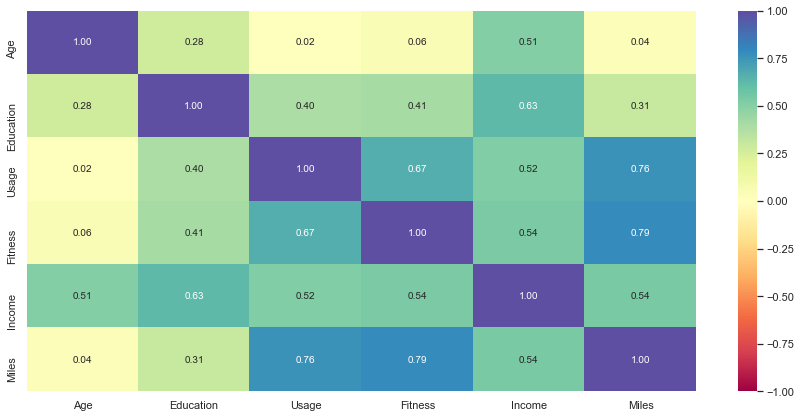

In [57]:
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Observations on  correlation plots

* Miles with Fitness and Usage shows strong postive corellation more than .7 


## Pair Plots


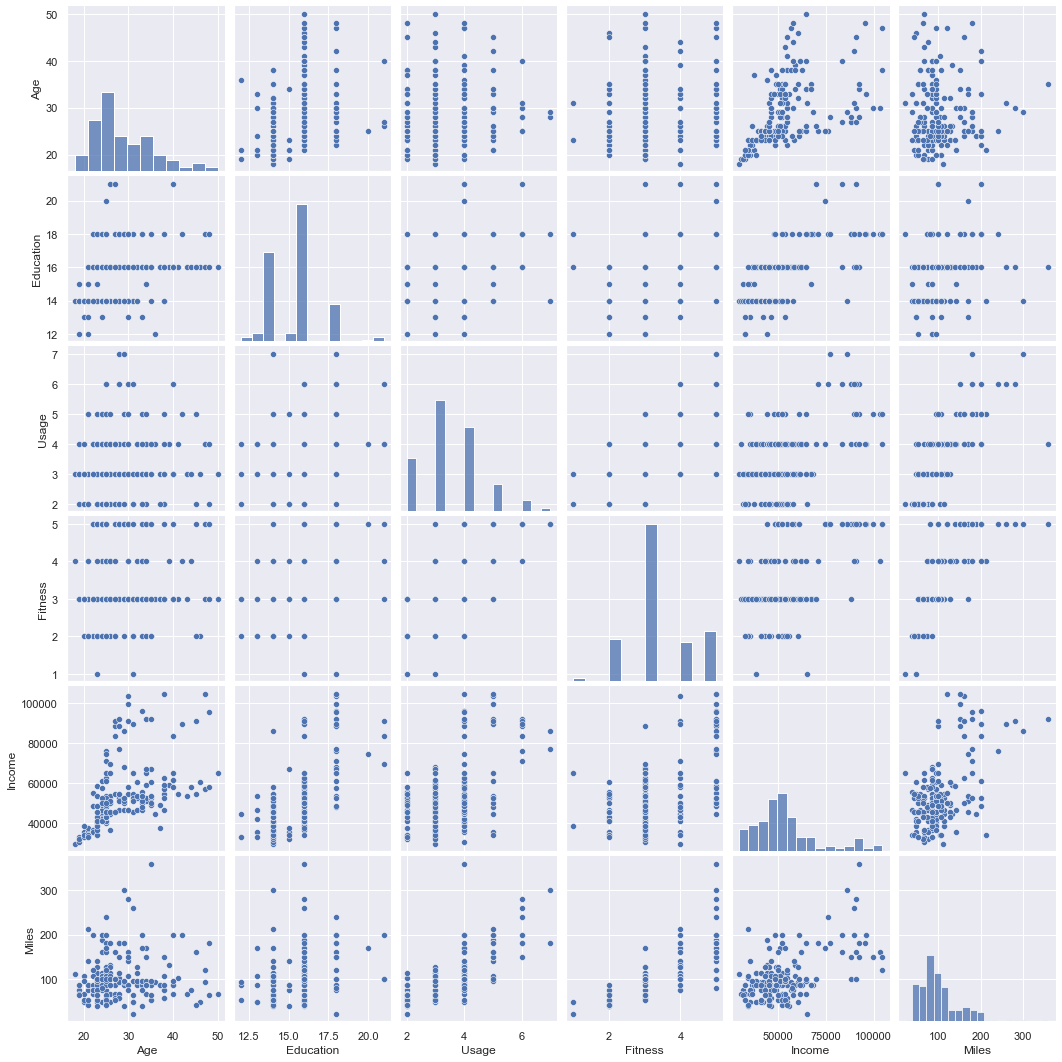

In [58]:
sns.pairplot(df, diag_kind="hist");

### Observations on  correlation plots

* age, education shows rlation with higher age has high education 
* age less than 30 uses less than 3 times compared to other age groups 
* age and income shows relation, higher age makes high income 
* age and miles shows most age run around or less than 100 miles 
* education and usage spread accorss all levels 
* high education makes more income 
* usages and fitness are related, high usage shows high fitness level



# Final summary on customer Characteristics

* input data has 180 rows and 9 columns. 
* none of the columns has null or nan values, No missing data so we dont need to replace any data with default or mean values

### Customer
* total 104 male and 76 female profile in system
* TM195, Tm498 has high usage with adults 
* TM798 has high usage within youth age group 
* youth and adults as more moderate fit than other age groups 
* Miles with Fitness and Usage shows strong postive corellation more than .7 

### Product 

* they have 3 different products 
* 'TM195' 'TM498' 'TM798'
* TM195 is with 80 customers, 40 male amd 40 female and with different fitness levels
* TM498 is with 60 customers, 29 female, 31 Male
* TM798 is with 40 customers, 7 Female, 33 Male
* Product own count does not change by age_group many has TM195, then TM498 and few customer has TM798
* Majority of the customers are Adult age group
* Education level 18 and more owns mostly TM798 
* Education Level 14 or 16 mostly owns TM195 and TM498
* mostly all the customers using 3 product are at fitness level 3

### Age
* Avg age is 28.79, Min user is 18 yrs old and max is 50 yrs. 
* 25% falls on or under 24 yrs, 50% falls on on under 26, 75% on or under 33 yrs old.
* Majority customers are within age 20 to 30 
* very few customers are greater than 40
* there are few outliers beyond age 46

### Usage Weekly

* Avg all users use 3.46 times treadmills everyweek, Min is  times, max is 7 times 
* 25% is 3, 50% is also 3 and 75% is 4 times.
* Majority customers using 3 to 4 tmes weekly 
* still gound amount of customer using 2 times 
* very few cusomters are using more than 5 times 
* some outliers with 6 and 7 usage/week
* some outliers on all 3 product with high and low usage 
* TM798 has high usage compared to other 2 products 

### Fitness

* Avg fitness of all customers are 3.31 (Moderate to Fit), Min is unhealthy, Max is Very Fit 
* 25% are moderate, 50% are moderate and 75% is fit
* Majority customers are moderate fit with score 3.0
* still gound amount of customer are Fit and Very Fit 
* very few cusomters are unfit and very very low count of customers are very unfit
* has one very unfit outlier
* fitness level outlier exists with all 3 products 
* TM 798 has high fitness level compared to other 2 product 
* other 2 product has more customer in moderate and fit category 

### Miles Expected to run weekly

* Avg 103.19 miles / Week, Min is 21 miles/Week, max is 360 miles, 25% runs 66 miles,  50% runs 94 miles, 75% runs 114.75 miles/Week
* Majority customers are expected to run 50 to 110 miles a week 
* some customer are running more than 110 to 200 miles 
* very few cusomters are expected to run more than 200 miles 
* has lot of outliers beyond 175 miles/week

### Income level

* Avg income is 53719.58, Min is 29562.00, Max is 104581.00	
* 25% is  44058.75, 50% is 50596.50 and 75% is 58668.00
* Majority customers are within income range 30000 to 70000
* very few are making more than 70000
* and we have many outliers beyond 80K
* Men and women has some outliers making more than 85K
* men makes 25% is 46K, 50% is 51K and 75% is 61K
* women makes 25% is 43K, 50% is 51K and 75% is 55K

### Age and Fitness 

* 2 customers in mid 20s and 30s are very unfit
* some customers accross all age group are unfit 
* Majoirty custmers are moderate fit, and good amount in fit and very fit accross all age groups
* few outliers in age 20, 23, 32,33, 39, 41 shows very fit 
* one outlier in very unit at age 23 
* otherwise different age group fitness level vary from 2-4, some are in 5  

### Age And Education

* majority cutomers accorss all age group are with in education level 16 to 18 
* age 20 to 30 has more education level 14 
* very few in level 12, 13 or above 18
* we have outuliers around level 12,13, above 20, age gorup 30 and bove has some outliers with level 18 or more 

### Age and Income 


* income spread accross age, gradual increase in income with older age 
* some customer has high/low level in lower age and higher age groups 
* some outliers with higher income in age groups 23 to 38 

### Age and Miles 


* majority customers on all age groups run less than 100 miles / week 
* very few accorss all age  group run more than 100 miles 
* outliers in age group 21- 40 with high miles / week - very few 

### Fitness and Income 

* high income customers are fit or very fit 
* most customers income betweeb 30k to 70K falls within fitness level 2 to 4 
* some outluers on fitless level 3 and 4 with high incomes

### Fitness and Education

* higher education level shows high fitness level
* some outliers in 3 and 4 with high education level 

### Fitness and Miles 

* more miles they run, they show more fit 
* customer run less than 50 miles are in fitness level 1 and 2 
* some outliers in level 2 to 4 with miles running , level 5 has more outliers 

### Usage vs Income 

* low income customers uses the system less compoared to high income 
* < 70K incomes uses <4 times a week 
* there are outliers only in people using 4 times day with income 

### Education vs Income 
* higher education shows higher income 
* education level less than 15 are making less than 60K income 
* some outliers in Level 14, an 16 with high incomes 